In [2]:
import json

with open('mentalhealth.json','r',encoding='utf-8') as _mh_rd:
    _mh_json = json.load(_mh_rd)

In [3]:
list(_mh_json.keys())

['meta', 'data']

In [4]:
#How many records did we get?
len(_mh_json['data'])
#_mh_json['data'][:5]

8745

#So we have over 8000 records of data. 
#We will now push this into our MongoDB to store.
from pymongo import MongoClient
try:
    
    client = MongoClient("mongodb://localhost:27017")
    #db = _connect_mongo(host=host, port=port, username=username, password=password, db=db)
    client.server_info()
    #Fix below code for a successful connection
except Exception as e:
    print(e)
    client = MongoClient(host = '192.168.56.30:27017')
else:    
    print("Connection successful")
finally:
    print("Connection")

In [35]:
#We will create our database in MongoDB named []
db = client['mentalhealth3']

#add a collection to our database
mh_collection = db.mentalhealth

#and insert our data
insert_mh= mh_collection.insert_one(_mh_json)

In [7]:
#To organize our data into key:values, we will get the heads of our
#columns from the metadata part of the dictionary we loaded

headers= []
for i in range(len(_mh_json['meta']['view']['columns'])):
    headers.append(_mh_json['meta']['view']['columns'][i]['name'])

print(headers)

['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'Service Year', 'OMH Region Code', 'OMH Region Label', 'County Label', 'Age Group', 'Rate Code Group', 'Medicaid Enrollee Count by County', 'Count of Recipients by Rate Code Group and County', 'Units Total', 'Paid Claim Total']


In [8]:
#and get our value data as follows
body = []
temprow = []
for k in mh_collection.find({},{"data":1}):
    temprow.append(k.values())
body.append(temprow)

print(type(body))
print(len(body))


<class 'list'>
1


In [9]:
tmp = []
for i in body[0][0]:
    #print("-----")
    #print(i)
    tmp.append(i)

#print(tmp[1])


#for s in k:
 #   print(len(s))

In [10]:
#let's flatten our list
mhbody = [item1 for item1 in tmp[1]]
print(len(mhbody))
mhbody[:2]


8745


[['row-fhi8.adwm-hd87',
  '00000000-0000-0000-7863-CE3E01AF952E',
  0,
  1578688714,
  None,
  1578688714,
  None,
  '{ }',
  '2014',
  '2',
  'Central NY',
  'Broome',
  'Adult',
  'Assertive Community Treatment',
  '27255',
  '61',
  '622',
  '899264'],
 ['row-h6d4.cw2r-4gbf',
  '00000000-0000-0000-502E-C019510D5D14',
  0,
  1578688714,
  None,
  1578688714,
  None,
  '{ }',
  '2014',
  '2',
  'Central NY',
  'Broome',
  'Adult',
  'OMH Licensed Clinic Treatment',
  '27255',
  '2329',
  '16957',
  '1764794']]

In [11]:
import pandas as pd

#We can now build a dataframe by combining our headers and their values
mhdf = pd.DataFrame(mhbody, columns=headers)
mhdf.tail()


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Service Year,OMH Region Code,OMH Region Label,County Label,Age Group,Rate Code Group,Medicaid Enrollee Count by County,Count of Recipients by Rate Code Group and County,Units Total,Paid Claim Total
8740,row-n7gf_zn69-fwmc,00000000-0000-0000-9D84-0363C4145B4F,0,1578688714,None,1578688714,None,{ },2018,1,Western NY,Yates,Child,OMH/OASAS Certified Community Behavioral Healt...,2066,0,0,0
8741,row-gyd4.x3bj_qxuv,00000000-0000-0000-2FA7-123196841C3A,0,1578688714,None,1578688714,None,{ },2018,1,Western NY,Yates,Child,Psych Inpatient 28,2066,0,0,0
8742,row-p4rt~m23c_cpgc,00000000-0000-0000-BC14-CC1E97F4FB89,0,1578688714,None,1578688714,None,{ },2018,1,Western NY,Yates,Child,Psych Inpatient 31,2066,0,0,0
8743,row-vhsj-wjma.s7yq,00000000-0000-0000-B05E-A7E88AEAE4D7,0,1578688714,None,1578688714,None,{ },2018,1,Western NY,Yates,Child,Psych Inpatient SPC,2066,0,0,0
8744,row-tpcu_vjir.ek5p,00000000-0000-0000-0B22-BF2C9CCA1887,0,1578688714,None,1578688714,None,{ },2018,1,Western NY,Yates,Senior,OMH Licensed Clinic Treatment,559,0,0,0


In [12]:
#We will now venture into Data Preprocessing where we will clean 
#and polish the data before we begin analysis and visualization. 
#The following steps will be carried out in this phase;
#1. Treat missing rows, columns and values
#2. Inconsistent values like mistyped values or wrong data types
#3. Duplicate values
#4. Dropping unncessary rows

In [13]:
#We will begin by exploring our data

mhdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   sid                                                8745 non-null   object
 1   id                                                 8745 non-null   object
 2   position                                           8745 non-null   int64 
 3   created_at                                         8745 non-null   int64 
 4   created_meta                                       0 non-null      object
 5   updated_at                                         8745 non-null   int64 
 6   updated_meta                                       0 non-null      object
 7   meta                                               8745 non-null   object
 8   Service Year                                       8745 non-null   object
 9   OMH Region Code    

In [14]:
#From the meta-data, we know that some of the columns here are not useful
#to our analysis and we will drop them to focus our data. The following
#columns will be dropped.

col_drop = ['sid', 'id', 'position', 'created_at', 
            'created_meta', 'updated_at', 'updated_meta', 'meta']

mhdf = mhdf.drop(col_drop,axis=1)



In [15]:
#We will later conduct a unique analysis of the columns 
#and will drop rows so we won't address rows at this stage
#We will check for NaN values in our data
mhdf[mhdf.isna().any(axis=1)]

,Service Year,OMH Region Code,OMH Region Label,County Label,Age Group,Rate Code Group,Medicaid Enrollee Count by County,Count of Recipients by Rate Code Group and County,Units Total,Paid Claim Total


In [16]:
#Our data has been well prepared and contains no missing values
mhdf[3:4]

,Service Year,OMH Region Code,OMH Region Label,County Label,Age Group,Rate Code Group,Medicaid Enrollee Count by County,Count of Recipients by Rate Code Group and County,Units Total,Paid Claim Total
3,2014,2,Central NY,Broome,Adult,Comprehensive Psychiatric Emergency Program\nN...,27255,179,246,154516


In [17]:
mhdf = mhdf.replace(r'\n',' ', regex=False)

In [18]:
mhdf[3:4]

,Service Year,OMH Region Code,OMH Region Label,County Label,Age Group,Rate Code Group,Medicaid Enrollee Count by County,Count of Recipients by Rate Code Group and County,Units Total,Paid Claim Total
3,2014,2,Central NY,Broome,Adult,Comprehensive Psychiatric Emergency Program\nN...,27255,179,246,154516


In [19]:
#Our data does not have missing values

#So we will check the columns for duplicate or mis-spelt data

mhdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Service Year                                       8745 non-null   object
 1   OMH Region Code                                    8745 non-null   object
 2   OMH Region Label                                   8745 non-null   object
 3   County Label                                       8745 non-null   object
 4   Age Group                                          8745 non-null   object
 5   Rate Code Group                                    8745 non-null   object
 6   Medicaid Enrollee Count by County                  8745 non-null   object
 7   Count of Recipients by Rate Code Group and County  8745 non-null   object
 8   Units Total                                        8745 non-null   object
 9   Paid Claim Total   

In [20]:
#We will convert some columns to category datatype

mhdf = mhdf.astype({'OMH Region Code':'category','OMH Region Label':'category','County Label':'category','Age Group':'category','Rate Code Group':'category'})


In [21]:
#We will start by first getting the category columns in a list we can iterate the unique function on
cat_cols = mhdf.select_dtypes(include=["category"])
cat_cols = list(cat_cols.columns)
print(cat_cols)


['OMH Region Code', 'OMH Region Label', 'County Label', 'Age Group', 'Rate Code Group']


In [22]:
#To begin, we will convert all values to uppercase
for col in cat_cols:
    mhdf[col] = mhdf[col].str.upper()
    

In [23]:
for col in cat_cols:
    print("Col :", col)
    print("unique values are :",mhdf[col].sort_values().unique())
    print("________________")

Col : OMH Region Code
unique values are : ['1' '2' '3' '4' '5']
________________
Col : OMH Region Label
unique values are : ['CENTRAL NY' 'HUDSON RIVER' 'LONG ISLAND' 'NEW YORK CITY' 'WESTERN NY']
________________
Col : County Label
unique values are : ['ALBANY' 'ALLEGANY' 'BRONX' 'BROOME' 'CATTARAUGUS' 'CAYUGA' 'CHAUTAUQUA'
 'CHEMUNG' 'CHENANGO' 'CLINTON' 'COLUMBIA' 'CORTLAND' 'DELAWARE'
 'DUTCHESS' 'ERIE' 'ESSEX' 'FRANKLIN' 'FULTON' 'GENESEE' 'GREENE'
 'HAMILTON' 'HERKIMER' 'JEFFERSON' 'KINGS' 'LEWIS' 'LIVINGSTON' 'MADISON'
 'MONROE' 'MONTGOMERY' 'NASSAU' 'NEW YORK' 'NIAGARA' 'ONEIDA' 'ONONDAGA'
 'ONTARIO' 'ORANGE' 'ORLEANS' 'OSWEGO' 'OTSEGO' 'PUTNAM' 'QUEENS'
 'RENSSELAER' 'RICHMOND' 'ROCKLAND' 'SAINT LAWRENCE' 'SARATOGA'
 'SCHENECTADY' 'SCHOHARIE' 'SCHUYLER' 'SENECA' 'STEUBEN' 'SUFFOLK'
 'SULLIVAN' 'TIOGA' 'TOMPKINS' 'ULSTER' 'WARREN' 'WASHINGTON' 'WAYNE'
 'WESTCHESTER' 'WYOMING' 'YATES']
________________
Col : Age Group
unique values are : ['ADULT' 'CHILD' 'SENIOR']
______________

In [24]:
#We do not have misspelt values as well. We will continue our preprocessing
mhdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Service Year                                       8745 non-null   object
 1   OMH Region Code                                    8745 non-null   object
 2   OMH Region Label                                   8745 non-null   object
 3   County Label                                       8745 non-null   object
 4   Age Group                                          8745 non-null   object
 5   Rate Code Group                                    8745 non-null   object
 6   Medicaid Enrollee Count by County                  8745 non-null   object
 7   Count of Recipients by Rate Code Group and County  8745 non-null   object
 8   Units Total                                        8745 non-null   object
 9   Paid Claim Total   

In [25]:
#We have no missing values, our category values are well represented 
#and our columns are in the correct datatypes for analysis. 
#We are now ready to visualize our data

#PS: We choose not to change the date columns at the moment, 
#preferring to leave them as strings till they need to be worked with
mhdf.head()

,Service Year,OMH Region Code,OMH Region Label,County Label,Age Group,Rate Code Group,Medicaid Enrollee Count by County,Count of Recipients by Rate Code Group and County,Units Total,Paid Claim Total
0,2014,2,CENTRAL NY,BROOME,ADULT,ASSERTIVE COMMUNITY TREATMENT,27255,61,622,899264
1,2014,2,CENTRAL NY,BROOME,ADULT,OMH LICENSED CLINIC TREATMENT,27255,2329,16957,1764794
2,2014,2,CENTRAL NY,BROOME,ADULT,COMMUNITY RESIDENCE,27255,92,610,1437842
3,2014,2,CENTRAL NY,BROOME,ADULT,COMPREHENSIVE PSYCHIATRIC EMERGENCY PROGRAM\nN...,27255,179,246,154516
4,2014,2,CENTRAL NY,BROOME,ADULT,MH EMERGENCY,27255,1005,1539,427157


In [26]:
#We will now insert our clean data to Postgres
#We will first establish a connection with our 
#Postgre server and create a database
'''
import psycopg2

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE dapgroupm;')
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): 
        dbConnection.close()
  '''      

Error while connecting to PostgreSQL database "dapgroupm" already exists



In [27]:
try:
    dbConnection = psycopg2.connect(
    #user = "dap",
    #password = "dap",
    #host = "192.168.56.30",
    #port = "5432",
    #database = "dapgroupm"
    user = "postgres",
    password = "lightyear",
    host = "localhost",
    port = "5432",
    database = "dapgroupm")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("DROP TABLE newyorkmentalhealth")
    dbCursor.close()
    print("Successful")
except (Exception, psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL, Error is: ", dbError)
finally:
    if(dbConnection): 
        dbConnection.close()

Successful


In [28]:
createString = """
CREATE TABLE newyorkmentalhealth(
service_year varchar,
omh_region_code varchar,
omh_region_label varchar,
county_label varchar,
age_group varchar,
rate_code_group varchar,
med_e_c int,
crrcgc int,
units_total int,
paid_claim_total int
);
"""
try:
    dbConnection = psycopg2.connect(
    #user = "dap",
    #password = "dap",
    #host = "192.168.56.30",
    #port = "5432",
    #database = "dapgroupm"
    user = "postgres",
    password = "lightyear",
    host = "localhost",
    port = "5432",
    database = "dapgroupm")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
    
except (Exception, psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL, Error is: ", dbError)
else:
    print("Table created successfully")
finally:
    if(dbConnection): 
        dbConnection.close()

Table created successfully


In [29]:

mhdf.to_csv('newyorkmentalhealth.csv', index=False, na_rep='NA')

In [30]:
import csv

try:
    dbConnection = psycopg2.connect(
    #user = "dap",
    #password = "dap",
    #host = "192.168.56.30",
    #port = "5432",
    #database = "dapgroupm"
    user = "postgres",
    password = "lightyear",
    host = "localhost",
    port = "5432",
    database = "dapgroupm")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    insertstring = "COPY %s FROM STDIN WITH CSV HEADER DELIMITER AS ','"
    file = open("newyorkmentalhealth.csv", "r")
    #Inserting data from merged CSV into table in Postgres
    with dbConnection.cursor() as cur:
        cur.execute("truncate " + "newyorkmentalhealth" + ";")
        cur.copy_expert(sql=insertstring % "newyorkmentalhealth", 
                        file=file)
        dbConnection.commit()       
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
else:
    print("Commit successful")
    print("Import is successful")
finally:
    if(dbConnection): dbConnection.close()


Commit successful
Import is successful


Connection successful
Dataframe has been loaded
Barplot loading...
Connection closed


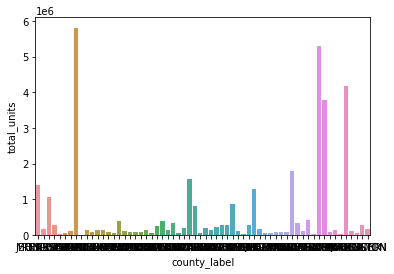

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.io.sql as sqlio

sql = """SELECT 
county_label,
sum(units_total) as total_units

FROM 
    newyorkmentalhealth 
    
GROUP BY
    county_label
"""
try:
        dbConnection = psycopg2.connect(
    #user = "dap",
    #password = "dap",
    #host = "192.168.56.30",
    #port = "5432",
    #database = "dapgroupm"
    user = "postgres",
    password = "lightyear",
    host = "localhost",
    port = "5432",
    database = "dapgroupm")    
    print("Connection successful")
    county_by_unit = sqlio.read_sql_query(sql, dbConnection)
    
    
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
else:
    print("Dataframe has been loaded")
    print("Barplot loading...")
    sns.barplot(x="county_label", y="total_units", data=county_by_unit)
finally:
    if(dbConnection): 
        dbConnection.close()
    print("Connection closed")

In [32]:
sql = '''
SELECT 
county_label,
count(med_e_c) as  Count_of_MedicAid,
count(crrcgc) as Count_of_Recipients,
count(units_total) as Count_of_Total_Units,
count(paid_claim_total) as Count_of_Total_Paid_Claims,

sum(med_e_c) as  Sum_of_County_MedicAid,
sum(crrcgc) as Sum_of_Recipients,
sum(units_total) as Sum_of_Total_Units,
sum(paid_claim_total) as Sum_of_Total_Paid_Claims,

avg(med_e_c) as  Average_of_County_MedicAid,
avg(crrcgc) as Average_of_Recipients,
avg(units_total) as Average_of_Total_Units,
avg(paid_claim_total) as Average_of_Total_Paid_Claims,

max(med_e_c) as  Maximum_of_County_MedicAid,
max(crrcgc) as Maximum_of_Recipients,
max(units_total) as Maximum_of_Total_Units,
max(paid_claim_total) as Maximum_of_Total_Paid_Claims,

min(med_e_c) as  Minimum_of_County_MedicAid,
min(crrcgc) as Minimum_of_Recipients,
min(units_total) as Minimum_of_Total_Units,
min(paid_claim_total) as Minimum_of_Total_Paid_Claims


FROM newyorkmentalhealth


GROUP BY county_label;
'''

try:
        dbConnection = psycopg2.connect(
    #user = "dap",
    #password = "dap",
    #host = "192.168.56.30",
    #port = "5432",
    #database = "dapgroupm"
    user = "postgres",
    password = "lightyear",
    host = "localhost",
    port = "5432",
    database = "dapgroupm")
    county_df = sqlio.read_sql_query(sql, dbConnection)
except (Exception, psycopg2.Error) as dbError :
    print ("Error:", dbError)
else:
    county_df.info()
finally:
    if(dbConnection): 
        dbConnection.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county_label                  62 non-null     object 
 1   count_of_medicaid             62 non-null     int64  
 2   count_of_recipients           62 non-null     int64  
 3   count_of_total_units          62 non-null     int64  
 4   count_of_total_paid_claims    62 non-null     int64  
 5   sum_of_county_medicaid        62 non-null     int64  
 6   sum_of_recipients             62 non-null     int64  
 7   sum_of_total_units            62 non-null     int64  
 8   sum_of_total_paid_claims      62 non-null     int64  
 9   average_of_county_medicaid    62 non-null     float64
 10  average_of_recipients         62 non-null     float64
 11  average_of_total_units        62 non-null     float64
 12  average_of_total_paid_claims  62 non-null     float64
 13  maximum

In [33]:
county_df.head()

,county_label,count_of_medicaid,count_of_recipients,count_of_total_units,count_of_total_paid_claims,sum_of_county_medicaid,sum_of_recipients,sum_of_total_units,sum_of_total_paid_claims,average_of_county_medicaid,...,average_of_total_units,average_of_total_paid_claims,maximum_of_county_medicaid,maximum_of_recipients,maximum_of_total_units,maximum_of_total_paid_claims,minimum_of_county_medicaid,minimum_of_recipients,minimum_of_total_units,minimum_of_total_paid_claims
0,MONROE,168,168,168,168,11177403,173740,1398418,298452259,66532.160714,...,8323.916667,1.776502e+06,105164,17513,153054,17005595,14229,0,0,0
1,JEFFERSON,122,122,122,122,1201931,25854,170747,43251121,9851.893443,...,1399.565574,3.545174e+05,14501,3753,27983,2710688,2362,0,0,0
2,NASSAU,193,193,193,193,16546142,99500,1050496,414154479,85731.305699,...,5442.984456,2.145878e+06,140831,7138,88440,28681169,29957,0,0,0
3,RENSSELAER,141,141,141,141,1784531,30114,266662,75146640,12656.248227,...,1891.219858,5.329549e+05,18662,2539,26294,4154727,2711,0,0,0
4,SCHUYLER,110,110,110,110,189983,3161,22769,3704655,1727.118182,...,206.990909,3.367868e+04,2518,416,3780,481065,500,0,0,0
